In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline   
import numpy as np

In [2]:
data = pd.read_csv("K_means_data.csv")

In [3]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

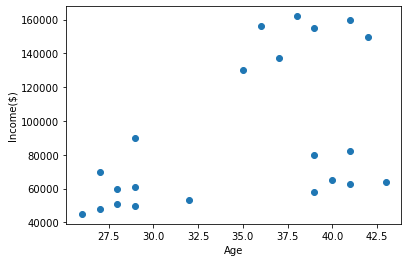

In [4]:
plt.scatter(data.Age, data["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [5]:
##Scaling##
scaler = MinMaxScaler()
income_array = np.array(data["Income($)"])
scaler.fit(data[["Income($)"]])
data["Income($)"] = scaler.transform(income_array.reshape(-1, 1))
scaler.fit((np.array(data.Age)).reshape(-1,1))
data.Age = scaler.transform((np.array(data.Age)).reshape(-1,1))


C:\Users\amoha\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [6]:
km = KMeans(n_clusters = 3)
prediction = km.fit_predict(data[["Age","Income($)"]])
prediction

C:\Users\amoha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amoha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [7]:
data["Prediction"] = prediction
data.head()

,Name,Age,Income($),Prediction
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


In [8]:
C1 = data[data.Prediction == 0]
C2 = data[data.Prediction == 1]
C3 = data[data.Prediction == 2]


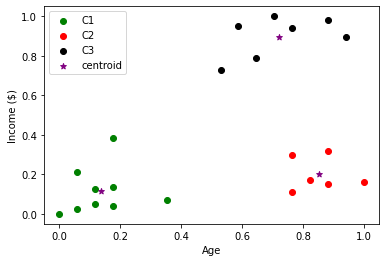

In [9]:
plt.scatter(C1["Age"],C1["Income($)"] , color ="green" ,label="C1")
plt.scatter(C2["Age"],C2["Income($)"] , color ="red" ,label="C2")
plt.scatter(C3["Age"],C3["Income($)"] , color ="black",label="C3" )
plt.xlabel("Age")
plt.ylabel('Income ($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],
            color='purple',marker='*',label="centroid")
plt.legend()

C:\Users\amoha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amoha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\amoha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\amoha\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

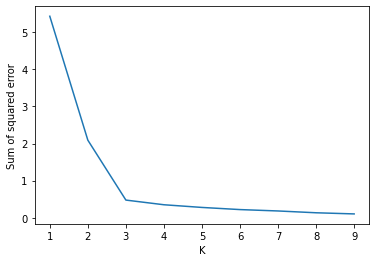

In [10]:
###Elbow Method###
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['Age','Income($)']])
    sse.append(km.inertia_)  ###km.inertia_ = sum of Squared Errors
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse) 